In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import h5py
from pykrx import stock

### 데이터 읽어오기

In [15]:
company = pd.read_csv("./KOSPIcompany.csv") # 회사명 - 종목번호 csv파일
company.head()

,회사명,종목번호
0,3S,060310
1,AJ네트웍스,095570
2,AK홀딩스,006840
3,APS홀딩스,054620
4,AP시스템,265520


In [56]:
stock_data = h5py.File("/Users/hwarang/Desktop/Stockprediction_proj/StockData.hdf5", 'r') # 주가자료 파일

StockData.hdf5 => /KOSPI/종목번호/(values, date)<br>
위와같은 계층구조로 되어 있고 KOSPI와 각 종목번호는 메타데이터를 가지고 있습니다.<br>
KOSPI는 desription과 각 종목들의 주가 데이터중 column에 해당하는 value_names를 가지고 있습니다.<br>
각 종목번호는 kr_name이라는 메타데이터를 가지고 있으며 해당 종목번호의 회사명입니다.

In [142]:
stock_data.attrs.keys() # 가지고 있는 attrs값 확인

<KeysViewHDF5 ['description', 'value_names']>


In [105]:
print(stock_data.attrs['description']) # metadata 호출


    주식시장 자료 일간격 시세
    /KOSPI/종목번호/values = (n/5)차원 데이터
    Open, High, Low, Close, Volume 순서대로
    시가, 고가, 저가, 종가, 거래량
    /KOSPI/종목번호/date = 날짜
    


In [108]:
print(stock_data.attrs['value_names'])

['Open' 'High' 'Low' 'Close' 'Volume']


총 2472개의 회사 중 데이터가 없는 회사가 2곳 있었는데 두 곳 모두 2020년 8월 5일 처음 상장된 회사였습니다. 따라서 총 2470곳의 주가 데이터를 수집했습니다.

In [23]:
stock_data['KOSPI']

<HDF5 group "/KOSPI" (2470 members)>

In [38]:
stock_data['/KOSPI/006840'].attrs['kr_name'] # 해당 종목번호의 회사명 출력해보기

'AK홀딩스'

In [88]:
company[(company['종목번호'] == '357250') | (company['종목번호'] == '350520')]

,회사명,종목번호
792,미래에셋맵스리츠,357250
1706,이지스레지던스리츠,350520


8월 5일에 상장하여 데이터가 없는 두 회사를 제외하고 나머지 회사들의 주가 데이터중 누락값이 있는지 확인합니다.

In [95]:
company_ = company[~((company['종목번호'] == '357250') | (company['종목번호'] == '350520'))].reset_index(drop=True)

In [97]:
isnull = []
for i in company_['종목번호']:
    isnull.append(np.sum(np.isnan(stock_data[f'/KOSPI/{i}/values'][:])))

In [99]:
np.sum(isnull) # 누락값 없음

0

### 받아온 주가 자료료 임의의 회사 주가 시계열 그려보기

In [131]:
_006840 = pd.DataFrame(stock_data['/KOSPI/006840/values'][:], 
                       index = pd.to_datetime(stock_data['/KOSPI/006840/date'][:]),
                       columns = stock_data.attrs['value_names'])

In [132]:
_006840.head()

,Open,High,Low,Close,Volume
2000-01-04,19533,21381,19533,20474,11830
2000-01-05,19722,20599,19409,20443,9810
2000-01-06,20536,20974,19721,20600,31620
2000-01-07,20034,22852,20034,21914,50840
2000-01-10,22601,24417,21913,24357,80250


Text(0.5, 1.0, 'AK holdings')

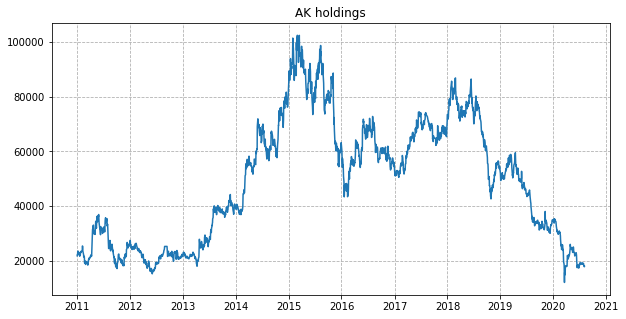

In [140]:
plt.figure(figsize = (10, 5))
plt.plot(_006840['2011-01-01':]['Close']) # 2011년 1월 1일부터 현재까지 그리기
plt.grid(ls = "--")
plt.title("AK holdings")

### AK홀딩스 네이버 증권정보

<img src=./images/006840_search.png width=600 align=left>